In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from algoritmer import bfgs
from tensegrity import TensegrityStructure
import tests as TEST
import os
try:
    os.mkdir("../Bilder/")
except FileExistsError:
    print("Directory already created")


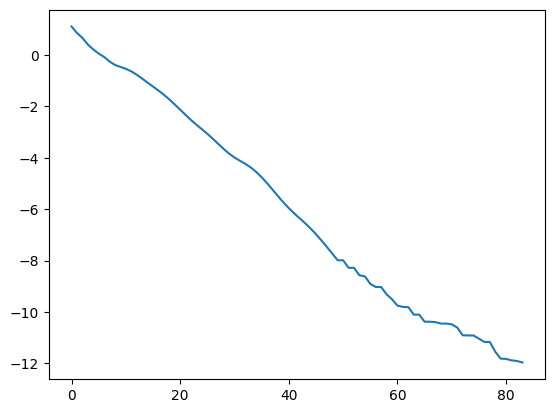

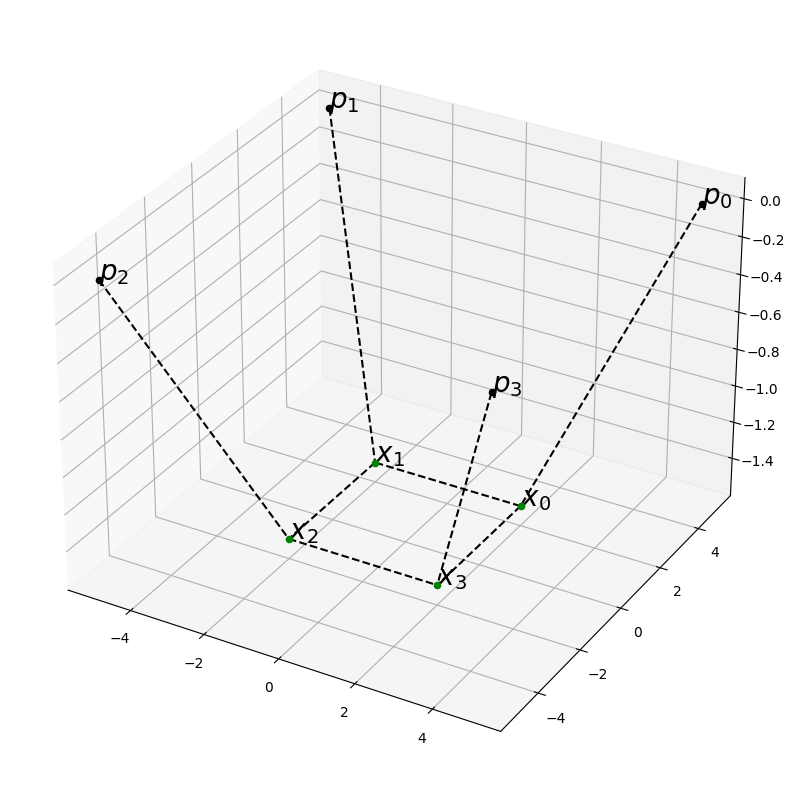

In [6]:
ts =  TEST.P25
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=500, convergence_plot=True)
res = np.reshape(res,(-1, 3))

plt.plot(np.log10(conv))
fig, ax = ts.plot(res)
plt.savefig("../Bilder/P25.pdf") # Used in report.

np.save("tests/P25", res)


In [ ]:
ts =  TEST.P69
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=500, convergence_plot=True)
res = np.reshape(res,(-1, 3))
plt.plot(np.log10(conv))

plt.savefig("../Bilder/P69conv.pdf") # Used in report.

fig, ax = ts.plot(res)

plt.savefig("../Bilder/P69.pdf") # Used in report.

np.save("tests/P69", res)


In [ ]:
ts = TEST.SANITYCHECK
x0 = np.arange(3 * len(ts.free_weights))
muMax = 1e10
for mu in np.linspace(1, muMax, 20):
    print(mu)
    x0 = bfgs(x0, ts.func(mu), ts.grad(mu), Niter=100)

res = bfgs(x0, ts.func(muMax), ts.grad(muMax), Niter=1000, plot_summary=True)


 0: 547, 30.0 
 1: 59, 360.0 
 2: 65, 4320.0 
 3: 28, 51840.0 
 4: 28, 622080.0 
 5: 27, 7464960.0 
 6: 31, 89579520.0 
 7: 27, 1074954240.0 
Maximum iteration obtained in BFGS method
Gradient at solution: 
 [[ 3.74114802e-15  3.86936577e-14  5.00000000e-05]
 [-4.38199824e-14 -3.46727855e-15  5.00000000e-05]
 [ 1.71067804e-13 -1.29147344e-13  5.00000000e-05]
 [-3.37499126e-14 -9.87838283e-15  5.00000000e-05]
 [-3.77345724e-15 -2.09218493e-14  5.00000000e-05]
 [-1.19528953e-14  1.42589933e-14  5.00000000e-05]
 [ 1.48559550e-14 -1.95858954e-14  5.00000000e-05]] 
 with norm: 
0.0001322875655531722

Solution: 
[[ 2.48124657e-01  1.66136672e+00 -5.58163295e-13]
 [ 1.00000000e+00  1.00000000e+00 -5.58163295e-13]
 [ 2.48124657e-01  1.66136672e+00 -5.58163290e-13]
 [ 6.64400630e+00  8.93253044e+00 -5.58163293e-13]
 [ 7.39588164e+00  8.27116372e+00 -5.58163294e-13]
 [ 6.64400630e+00  8.93253044e+00 -5.58163296e-13]
 [ 7.39588164e+00  8.27116372e+00 -5.58163298e-13]]
 with function value: 
0.010

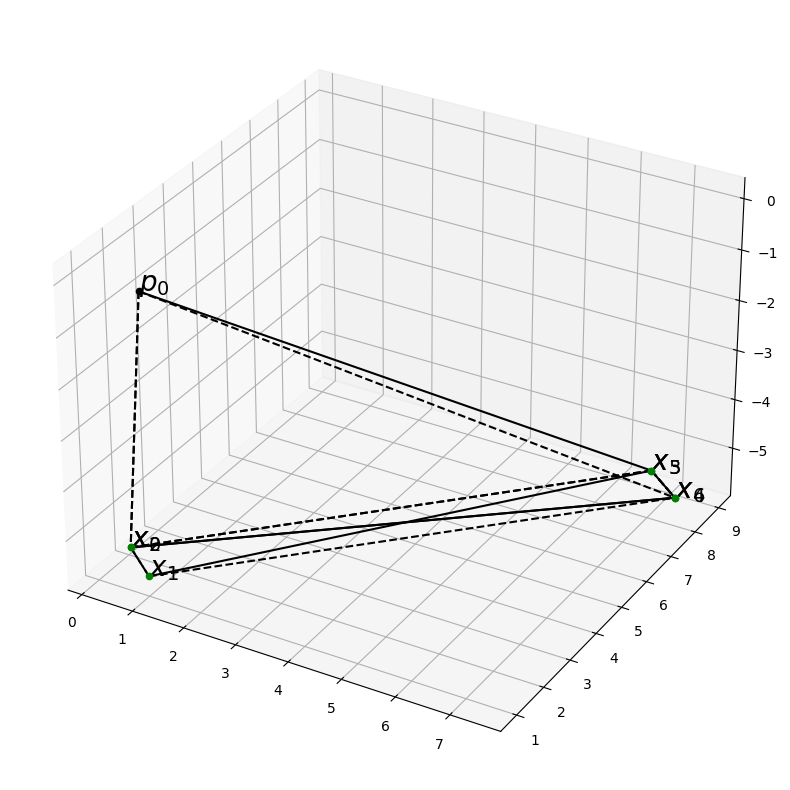

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, approx_fprime
import tests as TEST
from algoritmer import bfgs



ts = TEST.FREESTANDING
x0 = np.arange(3 * len(ts.free_weights)) * 10


mu = 10
res = x0.copy()

prev = x0
for i in range(100):
    res, num = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    print(f' {i}: {num}, {mu} ')

    if np.linalg.norm(res - prev) < 1e-10:
        break
    prev = res.copy()


bfgs(res, ts.func(0), ts.grad(0), Niter=0, plot_summary=True)
ts.plot(res)
plt.show()


[[ 1.87415737e+00  5.14349550e-01 -2.99084412e-12]
 [ 9.97761844e-01  1.00156524e+00 -2.99084410e-12]
 [ 2.41659462e-01  1.65602429e+00 -2.99084412e-12]
 [ 6.57942583e+00  8.97810506e+00 -2.99084411e-12]
 [ 5.70303031e+00  9.46532074e+00 -2.99084410e-12]
 [ 6.57718768e+00  8.97967029e+00 -2.99084413e-12]
 [ 7.33552822e+00  8.32364601e+00 -2.99084413e-12]]
0.010259833317707934
[[ 2.33547990e-14  2.79788345e-13 -5.49999998e-04]
 [-7.30914895e-14 -1.59401138e-13 -5.49999994e-04]
 [-2.72956571e-14 -1.03142104e-13 -5.49999999e-04]
 [ 7.15421646e-15 -1.15485746e-13 -5.49999997e-04]
 [-2.10867348e-13 -2.82623317e-13 -5.49999995e-04]
 [-3.25034487e-13 -2.13871022e-13 -5.50000000e-04]
 [ 1.22512460e-13 -9.63771164e-14 -5.50000001e-04]]
200612260.0857601


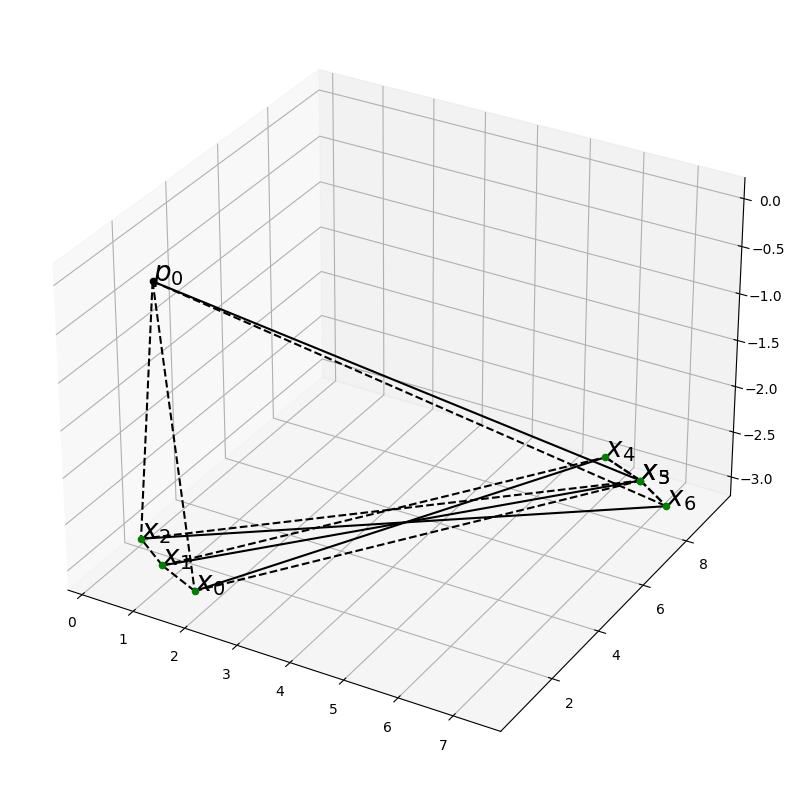

In [4]:
ts.plot(res)
print(res.reshape((-1, 3)))

print(ts.func(mu)(res))
print(ts.grad(mu)(res).reshape((-1,3)))
print(mu)
